## #STEP1 Importing the libraries 

In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## #STEP2 Calling Our Data (Train and Test)

In [119]:
df = pd.read_csv(r'train.csv')

In [120]:
df_test = pd.read_csv(r'test.csv')

In [121]:
df.shape

(228, 15)

In [122]:
df_test.shape

(75, 14)

## STEP3 see if there are any Missing (NAN) values

In [123]:
df.isnull().sum()

id                 0
age                0
sex                0
chest_pain         0
resting_bp         0
cholestoral        0
high_sugar         0
ecg                0
max_rate           0
exercise_angina    0
st_depression      0
slope              0
vessels            4
thalium_scan       2
heart_disease      0
dtype: int64

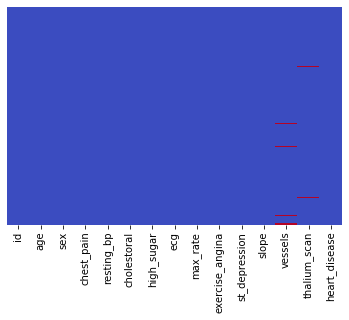

In [124]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

In [125]:
df_test.isnull().sum()

id                 0
age                0
sex                0
chest_pain         0
resting_bp         0
cholestoral        0
high_sugar         0
ecg                0
max_rate           0
exercise_angina    0
st_depression      0
slope              0
vessels            0
thalium_scan       0
dtype: int64

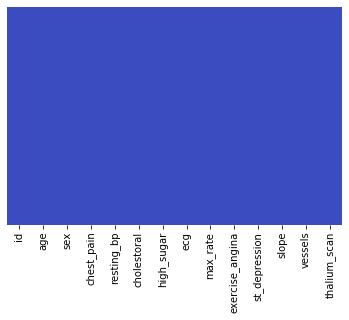

In [126]:
sns.heatmap(df_test.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

### Drop unneeded columns

In [127]:
df=df.drop(['id'],axis=1)
df_test=df_test.drop(['id'],axis=1)

In [136]:
df.head()

,age,sex,chest_pain,resting_bp,cholestoral,high_sugar,ecg,max_rate,exercise_angina,st_depression,slope,vessels,thalium_scan,heart_disease
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
4,56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0


In [129]:
df.thalium_scan.dtypes

dtype('float64')

In [130]:
df.vessels.dtypes

dtype('float64')

## STEP4 Fill NANvalues by the mean 

In [131]:
df['thalium_scan']=df['thalium_scan'].fillna(df['thalium_scan'].mean())
df['vessels']=df['vessels'].fillna(df['vessels'].mean())

## STEP 5 Concatenate all the data in one DataFrame

In [132]:
final_df=pd.concat([df,df_test],axis=0)

F:\Anacondaaa\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [133]:
final_df.shape

(303, 14)

In [134]:
final_df =final_df.loc[:,~final_df.columns.duplicated()]

In [135]:
final_df.head()

,age,chest_pain,cholestoral,ecg,exercise_angina,heart_disease,high_sugar,max_rate,resting_bp,sex,slope,st_depression,thalium_scan,vessels
0,63,1,233,2,0,0.0,1,150,145,1,3,2.3,6.0,0.0
1,67,4,286,2,1,1.0,0,108,160,1,2,1.5,3.0,3.0
2,67,4,229,2,1,1.0,0,129,120,1,2,2.6,7.0,2.0
3,41,2,204,2,0,0.0,0,172,130,0,1,1.4,3.0,0.0
4,56,2,236,0,0,0.0,0,178,120,1,1,0.8,3.0,0.0


In [152]:
df_Train=final_df.iloc[:182,:]
df_Test=final_df.iloc[182:,:]

In [153]:
df_Test.drop(['heart_disease'],axis=1,inplace=True)

F:\Anacondaaa\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [154]:
x_train = df_Train.drop(['heart_disease'],axis=1)
y_train = df_Train['heart_disease']

## STEP 6 You can import any Machine learning Classification algorithm 

In [155]:
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier

## I used Logistic Regression to Train(fit) the model

In [156]:
lr = LogisticRegression()
lr.fit(x_train , y_train)

F:\Anacondaaa\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

## Make the Prediction 

In [157]:
y_pred = lr.predict(df_Test)

In [158]:
y_pred

array([0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1.,
       0., 1., 1., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0.,
       1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1.,
       0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0.,
       0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
       1., 1.])

## STEP 7 Use the cross validation score to see if our model is doing well or not

In [175]:
from sklearn.model_selection import cross_val_score
scoring= 'accuracy'
score=cross_val_score(lr , x_train,y_train ,cv=8, n_jobs=1 ,scoring=scoring)
print(score)

[0.86956522 0.86956522 0.82608696 0.95652174 0.7826087  0.7826087
 0.86363636 0.81818182]


F:\Anacondaaa\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\Anacondaaa\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\Anacondaaa\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\Anacondaaa\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\Anacondaaa\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\Anacondaaa\lib\site-pa

In [176]:
round(np.mean(score)*100,2)

84.61